In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download  end-of-day (EOD) closing data for the EUR/USD exchange rate, as provided in the csv file under the EOD data file.
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [3]:
data = pd.DataFrame(raw['XAU='])
data.rename(columns={'XAU=': 'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

The most simple time series momentum strategy is to buy the stock if the last return was positive and to sell it if it was negative. With NumPy and pandas this is easy to formalize; just take the sign of the last available return as the market position. Figure 4-7 illustrates the performance of this strategy. The strategy does significantly
underperform the base instrument:

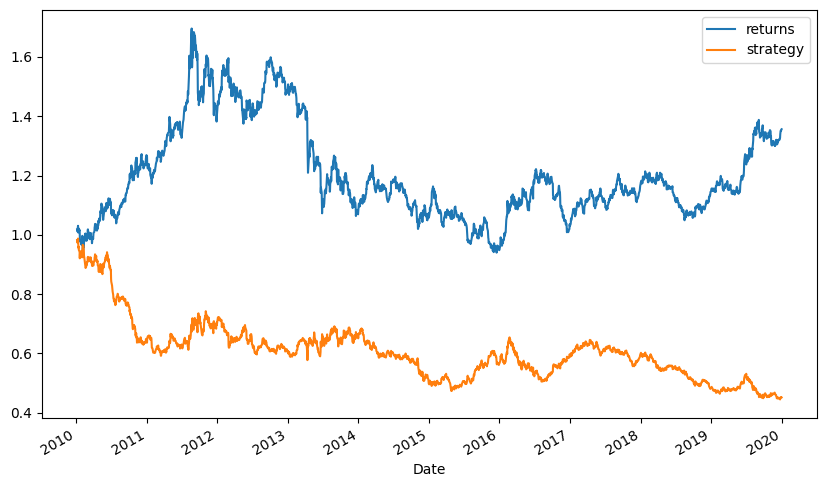

In [4]:
# Defines a new column with the sign (that is, 1 or –1) of the relevant log return; the resulting values represent the market positionings (long or short).
data['position'] = np.sign(data['returns'])

# Calculates the strategy log returns given the market positionings.
data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

Using a rolling time window, the time series momentum strategy can be generalized to more than just the last return. For example, the average of the last three returns can be used to generate the signal for the positioning. Figure 4-8 shows that the strategy in this case does much better, both in absolute terms and relative to the base instrument:

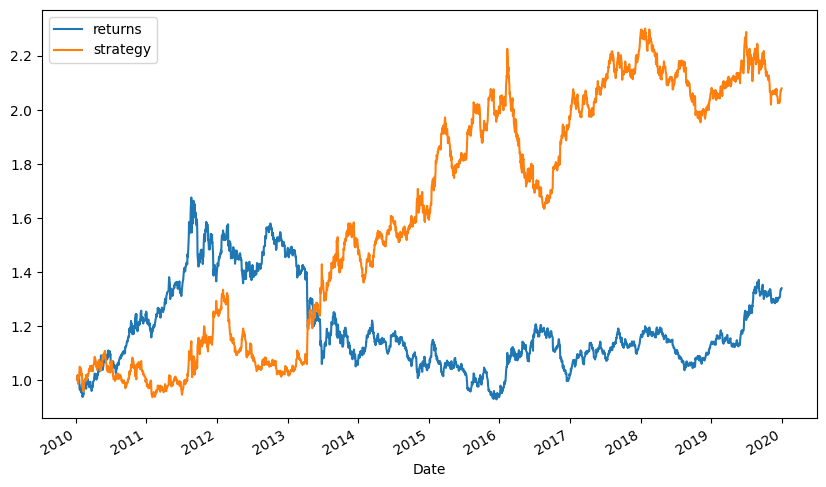

In [5]:
data['position'] = np.sign(data['returns'].rolling(3).mean())
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));


However, the performance is quite sensitive to the time window parameter. Choosing, for example, the last two returns instead of three leads to a much worse performance

In [6]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [ ]:
# Buscando dados da AAPL com intervalo de 1 minuto para o período especificado
data = obb.equity.price.historical(
    symbol="AAPL",
    start_date="2020-05-05",
    start_date="2020-05-05", 
    interval='1m',
    provider='yfinance'
)
